
# 📘 M3.3 Pandas 樞紐表與交叉表進階應用

本教學將深入探討 Pandas 中樞紐表(Pivot Table)與交叉表(Crosstab)的進階應用技巧。
這些強大的數據重塑工具能夠幫助我們從不同維度理解數據間的關聯，是數據分析人員必備的高級技能。


## 🎯 教學目標

- 🔍 深入理解樞紐表與交叉表的原理與運作機制
- 🔄 掌握複雜多層索引(MultiIndex)的處理與操作技巧
- 📊 學習樞紐表與交叉表的高級自定義與應用
- 🧮 掌握數據重塑(Reshaping)技術，如stack、unstack、melt等
- 🛠️ 探索實際業務案例中的多維數據分析方法


## 🧰 1. 環境設置

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設置中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設置中文字型為微軟正黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 100)
pd.set_option('display.precision', 2)

# 設置隨機種子以獲得可重現的結果
np.random.seed(42)


## 📊 2. 創建進階樣本數據集

In [132]:
# 創建一個更複雜的銷售數據集，包含時間、區域、產品、渠道等多個維度
n_rows = 1000

# 生成日期範圍 (2年的數據)
dates = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
sampled_dates = pd.to_datetime(np.random.choice(dates, n_rows))

sales_data = pd.DataFrame({
    'Date': sampled_dates,
    'Year': [d.year for d in sampled_dates],
    'Quarter': [f'Q{(d.month-1)//3+1}' for d in sampled_dates],
    'Month': [d.month for d in sampled_dates],
    'Region': np.random.choice(['North', 'South', 'East', 'West', 'Central'], n_rows),
    'City': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 
                             'Miami', 'Boston', 'Denver', 'Seattle', 'Atlanta'], n_rows),
    'Category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Books', 'Home'], n_rows),
    'Product': np.random.choice(['Product_A', 'Product_B', 'Product_C', 'Product_D', 
                               'Product_E', 'Product_F', 'Product_G', 'Product_H'], n_rows),
    'Channel': np.random.choice(['Online', 'Retail', 'Distributor', 'Direct'], n_rows),
    'Sales': np.random.uniform(100, 1000, n_rows).round(2),
    'Units': np.random.randint(1, 20, n_rows),
    'Returns': np.random.randint(0, 3, n_rows),
    'Discount': np.random.choice([0, 0.05, 0.1, 0.15, 0.2], n_rows),
    'Profit': np.random.uniform(10, 300, n_rows).round(2)
})

# 加入一些計算字段
sales_data['Revenue'] = sales_data['Sales'] * (1 - sales_data['Discount'])
sales_data['ProfitMargin'] = (sales_data['Profit'] / sales_data['Revenue'] * 100).round(1)

# 排序數據
sales_data = sales_data.sort_values(['Date', 'Region', 'Category'])

print("進階銷售數據集預覽:")
print(sales_data.head())
print(f"\n數據集維度: {sales_data.shape}")

進階銷售數據集預覽:
          Date  Year Quarter  Month   Region     City  ... Units Returns Discount  Profit  \
979 2022-01-01  2022      Q1      1  Central  Chicago  ...     5       1     0.10   63.55   
755 2022-01-01  2022      Q1      1     East  Chicago  ...     5       0     0.10  128.68   
648 2022-01-01  2022      Q1      1     East    Miami  ...    13       0     0.00   49.72   
212 2022-01-02  2022      Q1      1     East  Atlanta  ...    17       1     0.20  163.90   
68  2022-01-02  2022      Q1      1     East  Atlanta  ...    18       0     0.05   35.96   

     Revenue  ProfitMargin  
979   521.30          12.2  
755   863.91          14.9  
648   324.98          15.3  
212   554.98          29.5  
68    345.82          10.4  

[5 rows x 16 columns]

數據集維度: (1000, 16)



## 📊 3. 樞紐表高級操作與技巧


### 3.1 複雜樞紐表與多層索引

In [133]:
# 創建複雜的多維度樞紐表
advanced_pivot = pd.pivot_table(
    data=sales_data,
    values=['Revenue', 'Units', 'Profit', 'ProfitMargin'],  # 多個指標
    index=['Region', 'Category'],  # 多級行索引
    columns=['Year', 'Quarter'],  # 多級列索引
    aggfunc={                     # 不同值應用不同聚合函數
        'Revenue': 'sum',
        'Units': 'sum',
        'Profit': 'sum',
        'ProfitMargin': 'mean'
    },
    fill_value=0,
    margins=True,                 # 添加總計
    margins_name='Total'
)

print("複雜多維樞紐表:")
print(advanced_pivot.round(1))

複雜多維樞紐表:
                      Profit                                               ...   Units          \
Year                    2022                                2023           ...    2022    2023   
Quarter                   Q1       Q2       Q3       Q4       Q1       Q2  ...      Q4      Q1   
Region  Category                                                           ...                   
Central Books          792.9   1030.4   1038.4   1246.9   1227.6    792.4  ...    55.0    46.0   
        Clothing      1021.3    837.4    435.8    463.0    675.8    304.0  ...    51.0    44.0   
        Electronics   1416.3      0.0    485.8    606.2   1095.5   1070.2  ...    51.0    68.0   
        Food           696.4    377.6    844.7   1129.0    430.1   1064.9  ...    81.0    14.0   
        Home           234.7    862.0    843.0    210.0    296.3    126.0  ...    21.0    68.0   
...                      ...      ...      ...      ...      ...      ...  ...     ...     ...   
West    Clo

In [134]:
# 探索樞紐表的多層索引結構
print("多層行索引(Index)結構:")
print(advanced_pivot.index)

print("\n多層列索引(Columns)結構:")
print(advanced_pivot.columns)

# 使用索引名稱訪問
print("\n索引和列的名稱:")
print(f"行索引名稱: {advanced_pivot.index.names}")
print(f"列索引名稱: {advanced_pivot.columns.names}")

多層行索引(Index)結構:
MultiIndex([('Central',       'Books'),
            ('Central',    'Clothing'),
            ('Central', 'Electronics'),
            ('Central',        'Food'),
            ('Central',        'Home'),
            (   'East',       'Books'),
            (   'East',    'Clothing'),
            (   'East', 'Electronics'),
            (   'East',        'Food'),
            (   'East',        'Home'),
            (  'North',       'Books'),
            (  'North',    'Clothing'),
            (  'North', 'Electronics'),
            (  'North',        'Food'),
            (  'North',        'Home'),
            (  'South',       'Books'),
            (  'South',    'Clothing'),
            (  'South', 'Electronics'),
            (  'South',        'Food'),
            (  'South',        'Home'),
            (   'West',       'Books'),
            (   'West',    'Clothing'),
            (   'West', 'Electronics'),
            (   'West',        'Food'),
            (   'West', 


### 3.2 多層索引的高級操作

In [135]:
# 1. 使用 .loc 進行多層索引選擇
print("選擇特定區域的數據:")
print(advanced_pivot.loc['North'])

# 選擇特定區域和類別的數據
print("\n選擇North區域的Electronics類別:")
print(advanced_pivot.loc[('North', 'Electronics')])

# 2. 使用 .xs (cross-section) 進行更靈活的選擇
print("\n使用xs選擇特定季度的數據 (跨不同年份):")
q1_data = advanced_pivot.xs('Q1', level='Quarter', axis=1)
print(q1_data)

# 選擇特定年份和季度的組合
print("\n選擇2023年Q2的數據:")
q2_2023 = advanced_pivot.xs((2023, 'Q2'), level=('Year', 'Quarter'), axis=1)
print(q2_2023)

選擇特定區域的數據:
              Profit                                              ... Units                    \
Year            2022                               2023           ...  2022  2023               
Quarter           Q1       Q2       Q3      Q4       Q1       Q2  ...    Q4    Q1    Q2    Q3   
Category                                                          ...                           
Books         746.31   587.61  1201.06  579.86   476.94     0.00  ...  36.0  31.0   0.0  23.0   
Clothing     1281.04   584.44   158.50  417.26   701.62   503.81  ...  30.0  35.0  41.0  60.0   
Electronics  1202.50   969.45  1837.13  646.91   433.60   603.23  ...  47.0  23.0  45.0  37.0   
Food          726.73   582.80   605.76  674.63  1238.23   927.68  ...  42.0  56.0  64.0  50.0   
Home          815.19  1444.31  1292.75  255.10  1057.15  1144.53  ...  19.0  62.0  65.0  47.0   

                          
Year               Total  
Quarter         Q4        
Category                  
Books  

In [136]:
# 3. 索引重設、排序與重命名
# 重設部分層級
reset_region = advanced_pivot.reset_index(level='Region')
print("重設Region層級:")
print(reset_region.head())

# 索引排序
sorted_pivot = advanced_pivot.sort_index(level='Category', axis=0)
print("\n按類別排序:")
print(sorted_pivot.head())

# 列排序
col_sorted = advanced_pivot.sort_index(level=['Year', 'Quarter'], axis=1)
print("\n按年份和季度排序列:")
print(col_sorted.head())

# 索引重命名
renamed = advanced_pivot.rename_axis(index={'Region': 'Sales_Region', 'Category': 'Product_Category'})
print("\n重命名索引:")
print(renamed.head())

重設Region層級:
              Region   Profit                                      ... Units                    \
Year                     2022                                2023  ...  2022  2023               
Quarter                    Q1       Q2       Q3       Q4       Q1  ...    Q4    Q1    Q2    Q3   
Category                                                           ...                           
Books        Central   792.86  1030.44  1038.42  1246.89  1227.60  ...  55.0  46.0  38.0  65.0   
Clothing     Central  1021.28   837.39   435.77   463.03   675.79  ...  51.0  44.0  24.0  37.0   
Electronics  Central  1416.29     0.00   485.77   606.22  1095.46  ...  51.0  68.0  95.0  61.0   
Food         Central   696.36   377.59   844.74  1129.02   430.10  ...  81.0  14.0  67.0  44.0   
Home         Central   234.66   862.01   842.98   210.03   296.28  ...  21.0  68.0  31.0   9.0   

                         
Year              Total  
Quarter        Q4        
Category                 
B

In [137]:
# 4. 高級索引選擇與過濾
# 使用索引的get_level_values方法
electronics_food = advanced_pivot[advanced_pivot.index.get_level_values('Category').isin(['Electronics', 'Food'])]
print("選擇Electronics和Food類別:")
print(electronics_food.head())

# 選擇特定列數據 - 2023年的所有季度
idx = pd.IndexSlice
year_2023 = advanced_pivot.loc[:, idx[:, 2023, :]]

print("\n選擇2023年的所有季度數據:")
print(year_2023.head())

選擇Electronics和Food類別:
                      Profit                                               ... Units              \
Year                    2022                                2023           ...  2022  2023         
Quarter                   Q1       Q2       Q3       Q4       Q1       Q2  ...    Q4    Q1    Q2   
Region  Category                                                           ...                     
Central Electronics  1416.29     0.00   485.77   606.22  1095.46  1070.15  ...  51.0  68.0  95.0   
        Food          696.36   377.59   844.74  1129.02   430.10  1064.94  ...  81.0  14.0  67.0   
East    Electronics  1292.38   636.90   659.42   629.51  1208.90  1121.62  ...  35.0  78.0  61.0   
        Food          764.66  1666.71  1416.00   295.00   690.27   417.82  ...  21.0  41.0  15.0   
North   Electronics  1202.50   969.45  1837.13   646.91   433.60   603.23  ...  47.0  23.0  45.0   

                                       
Year                            Total


### 3.3 樞紐表的計算與自定義

In [138]:
sales_data["Units"].value_counts()

Units
10    64
18    62
7     62
5     61
12    61
      ..
15    47
9     45
8     43
11    39
14    38
Name: count, Length: 19, dtype: int64

In [139]:
def profit_per_unit(df):
    return df['Profit'].sum() / df['Units'].sum() if df['Units'].sum() > 0 else 0

def return_rate(df):
    return df['Returns'].sum() / df['Units'].sum() * 100 if df['Units'].sum() > 0 else 0

# 用 groupby 先分群
grouped = sales_data.groupby(['Region', 'Category', 'Channel'])

# 建立自定義彙總
aggregated = grouped.agg({
    'Revenue': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Units': 'sum',
    'Returns': 'sum'
}).reset_index()


# 計算額外欄位：profit_per_unit, return_rate
aggregated['Profit_per_Unit'] = grouped.apply(profit_per_unit, include_groups=False).values
aggregated['Return_Rate'] = grouped.apply(return_rate, include_groups=False).values

# 轉為 pivot 樞紐表
custom_pivot = aggregated.pivot(index=['Region', 'Category'], columns='Channel')

# 顯示結果
print("✅ 帶自定義聚合函數的樞紐表:")
print(custom_pivot.head())


✅ 帶自定義聚合函數的樞紐表:
                     Revenue                                                    ...  \
                         sum                                  mean              ...   
Channel               Direct Distributor   Online   Retail  Direct Distributor  ...   
Region  Category                                                                ...   
Central Books        5048.41     7093.14  6271.91  6158.59  458.95      506.65  ...   
        Clothing     4399.00     3598.77  2731.06  5114.79  488.78      399.86  ...   
        Electronics  3488.67     7092.65  3312.85  7598.63  436.08      591.05  ...   
        Food         6836.95     3768.78  5253.60  4626.49  455.80      538.40  ...   
        Home         5443.94     6576.42  1945.55  2580.25  494.90      597.86  ...   

                    Profit_per_Unit        Return_Rate                            
                                                                                  
Channel                      Onlin

In [140]:
# 2. 對樞紐表結果進行進一步處理
# 展平多層列索引
flattened = custom_pivot.copy()
flattened.columns = ['_'.join(map(str, col)).strip('_') for col in flattened.columns.values]
print("展平後的樞紐表:")
print(flattened.head())

# 添加來自樞紐表結果的新計算欄位
flattened['Revenue_sum_total'] = flattened.filter(like='Revenue_sum').sum(axis=1)
flattened['Profit_to_Revenue_ratio'] = (flattened.filter(like='Profit_sum').sum(axis=1) / 
                                      flattened['Revenue_sum_total']) * 100

print("\n添加計算欄位後的結果:")
print(flattened[['Revenue_sum_total', 'Profit_to_Revenue_ratio']].head())

展平後的樞紐表:
                     Revenue_sum_Direct  Revenue_sum_Distributor  Revenue_sum_Online  \
Region  Category                                                                       
Central Books                   5048.41                  7093.14             6271.91   
        Clothing                4399.00                  3598.77             2731.06   
        Electronics             3488.67                  7092.65             3312.85   
        Food                    6836.95                  3768.78             5253.60   
        Home                    5443.94                  6576.42             1945.55   

                     Revenue_sum_Retail  Revenue_mean_Direct  Revenue_mean_Distributor  ...  \
Region  Category                                                                        ...   
Central Books                   6158.59               458.95                    506.65  ...   
        Clothing                5114.79               488.78                    399.86  .

In [141]:
# 3. 樞紐表計算百分比變化
# 創建按年月分組的時間序列樞紐表
time_pivot = pd.pivot_table(
    data=sales_data,
    values='Revenue',
    index=['Category'],
    columns=['Year', 'Month'],
    aggfunc='sum'
)

print("時間序列樞紐表:")
print(time_pivot.head())

# 計算各類別同比增長 (2023 vs 2022)
growth_pivot = pd.DataFrame()
for month in range(1, 13):
    if (2022, month) in time_pivot.columns and (2023, month) in time_pivot.columns:
        col_name = f'Growth_M{month}'
        growth_pivot[col_name] = ((time_pivot[(2023, month)] / time_pivot[(2022, month)]) - 1) * 100

print("\n同比增長率 (%):")
print(growth_pivot.round(1).head())

時間序列樞紐表:
Year            2022                                               ...     2023                    \
Month             1        2        3        4        5        6   ...       7        8        9    
Category                                                           ...                              
Books        3291.48  3759.43  5805.00  5409.30  3047.01  6243.30  ...  7064.43  1047.90  2639.07   
Clothing     2524.65  7494.24  5268.11  7533.48  5645.90  1398.60  ...  2786.39  2810.81  3695.55   
Electronics  9107.69  5517.90  3186.34  4744.48  1662.87  3533.97  ...  4183.79   944.89  2784.74   
Food         4351.70  2270.28  1160.16  4592.43  4717.49  4210.48  ...  3260.86  3371.53  7346.31   
Home         3701.65  5432.29  2665.52  6226.43  5397.77  2593.01  ...  5939.29  2571.43  4697.52   

Year                                    
Month             10       11       12  
Category                                
Books        4534.49  5337.70  3503.98  
Clothing     2944.


## 📊 4. 交叉表高級應用


### 4.1 進階交叉表與多層次分析

In [142]:
# 1. 基本交叉表複習與進階用法
region_category_cross = pd.crosstab(
    index=sales_data['Region'],
    columns=sales_data['Category'],
    values=sales_data['Revenue'],
    aggfunc='sum',
    normalize=True,  # 標準化為比例
    margins=True,
    margins_name='Total'
)

print("區域和類別的收入交叉表 (佔比):")
print(region_category_cross.round(3))

區域和類別的收入交叉表 (佔比):
Category  Books  Clothing  Electronics  Food  Home  Total
Region                                                   
Central    0.05      0.03         0.04  0.04  0.03   0.20
East       0.04      0.03         0.04  0.04  0.04   0.19
North      0.03      0.04         0.05  0.04  0.05   0.21
South      0.04      0.05         0.04  0.04  0.04   0.21
West       0.04      0.03         0.04  0.04  0.04   0.19
Total      0.20      0.18         0.21  0.20  0.21   1.00


In [143]:
# 2. 多層次交叉表
# 創建一個三維交叉表: Region x Category x Channel
multi_cross = pd.crosstab(
    index=[sales_data['Region'], sales_data['City']],
    columns=[sales_data['Category'], sales_data['Channel']],
    values=sales_data['Revenue'],
    aggfunc='sum',
    normalize=False
)

print("多層次交叉表:")
print(multi_cross.head(10))

多層次交叉表:
Category               Books                               Clothing              ...     Food  \
Channel               Direct Distributor   Online   Retail   Direct Distributor  ...   Online   
Region  City                                                                     ...            
Central Atlanta      1478.80         NaN      NaN  1354.25      NaN         NaN  ...      NaN   
        Boston        325.70      376.43      NaN  1283.62      NaN         NaN  ...   411.55   
        Chicago       129.80      397.58   805.46   516.11      NaN         NaN  ...   328.74   
        Denver        318.12     1254.31   168.39      NaN   819.22         NaN  ...      NaN   
        Houston          NaN     2941.77  1560.57      NaN   389.00         NaN  ...   130.86   
        Los Angeles      NaN     1104.16   771.11  1774.99      NaN      273.98  ...      NaN   
        Miami         561.57         NaN   424.80   465.23      NaN     1028.77  ...  2372.38   
        New York     1

In [144]:
# 3. 條件交叉表與高級標準化
# 只針對單位銷量大於5的記錄
high_volume_mask = sales_data['Units'] > 5
high_volume_cross = pd.crosstab(
    index=sales_data.loc[high_volume_mask, 'Region'],
    columns=sales_data.loc[high_volume_mask, 'Category'],
    values=sales_data.loc[high_volume_mask, 'Revenue'],
    aggfunc='sum',
    normalize='columns'  # 按列標準化 (每列加總為1)
)

print("高銷量記錄的交叉表 (按列標準化):")
print(high_volume_cross.round(3))

# 按行標準化 (每行加總為1)
high_volume_cross_row = pd.crosstab(
    index=sales_data.loc[high_volume_mask, 'Region'],
    columns=sales_data.loc[high_volume_mask, 'Category'],
    values=sales_data.loc[high_volume_mask, 'Revenue'],
    aggfunc='sum',
    normalize='index'  # 按行標準化
)

print("\n高銷量記錄的交叉表 (按行標準化):")
print(high_volume_cross_row.round(3))

高銷量記錄的交叉表 (按列標準化):
Category  Books  Clothing  Electronics  Food  Home
Region                                            
Central    0.24      0.18         0.22  0.21  0.16
East       0.19      0.17         0.16  0.19  0.21
North      0.16      0.21         0.27  0.18  0.23
South      0.20      0.26         0.18  0.18  0.15
West       0.21      0.18         0.18  0.24  0.25

高銷量記錄的交叉表 (按行標準化):
Category  Books  Clothing  Electronics  Food  Home
Region                                            
Central    0.23      0.18         0.24  0.18  0.17
East       0.20      0.18         0.20  0.18  0.25
North      0.15      0.19         0.28  0.15  0.23
South      0.21      0.26         0.21  0.16  0.17
West       0.19      0.17         0.19  0.20  0.25



### 4.2 交叉表的統計檢驗與應用

In [145]:
# 1. 卡方檢驗 (Chi-Square Test)
from scipy.stats import chi2_contingency

# 創建類別和渠道的頻次交叉表 (無值，只計數)
category_channel_counts = pd.crosstab(sales_data['Category'], sales_data['Channel'])
print("類別和渠道的頻次交叉表:")
print(category_channel_counts)

# 執行卡方檢驗
chi2, p, dof, expected = chi2_contingency(category_channel_counts)
print("\n卡方檢驗結果:")
print(f"卡方值: {chi2:.2f}")
print(f"p值: {p:.6f}")
print(f"自由度: {dof}")

# 展示期望頻次
expected_df = pd.DataFrame(
    expected, 
    index=category_channel_counts.index, 
    columns=category_channel_counts.columns
)
print("\n期望頻次:")
print(expected_df.round(2))

類別和渠道的頻次交叉表:
Channel      Direct  Distributor  Online  Retail
Category                                        
Books            46           52      44      53
Clothing         43           40      50      45
Electronics      61           58      50      45
Food             50           49      50      56
Home             58           59      46      45

卡方檢驗結果:
卡方值: 8.25
p值: 0.765151
自由度: 12

期望頻次:
Channel      Direct  Distributor  Online  Retail
Category                                        
Books         50.31        50.31   46.80   47.58
Clothing      45.92        45.92   42.72   43.43
Electronics   55.21        55.21   51.36   52.22
Food          52.89        52.89   49.20   50.02
Home          53.66        53.66   49.92   50.75


標準化殘差:
Channel      Direct  Distributor  Online  Retail
Category                                        
Books         -0.61         0.24   -0.41    0.79
Clothing      -0.43        -0.87    1.11    0.24
Electronics    0.78         0.38   -0.19   -1.00
Food          -0.40        -0.53    0.11    0.85
Home           0.59         0.73   -0.55   -0.81


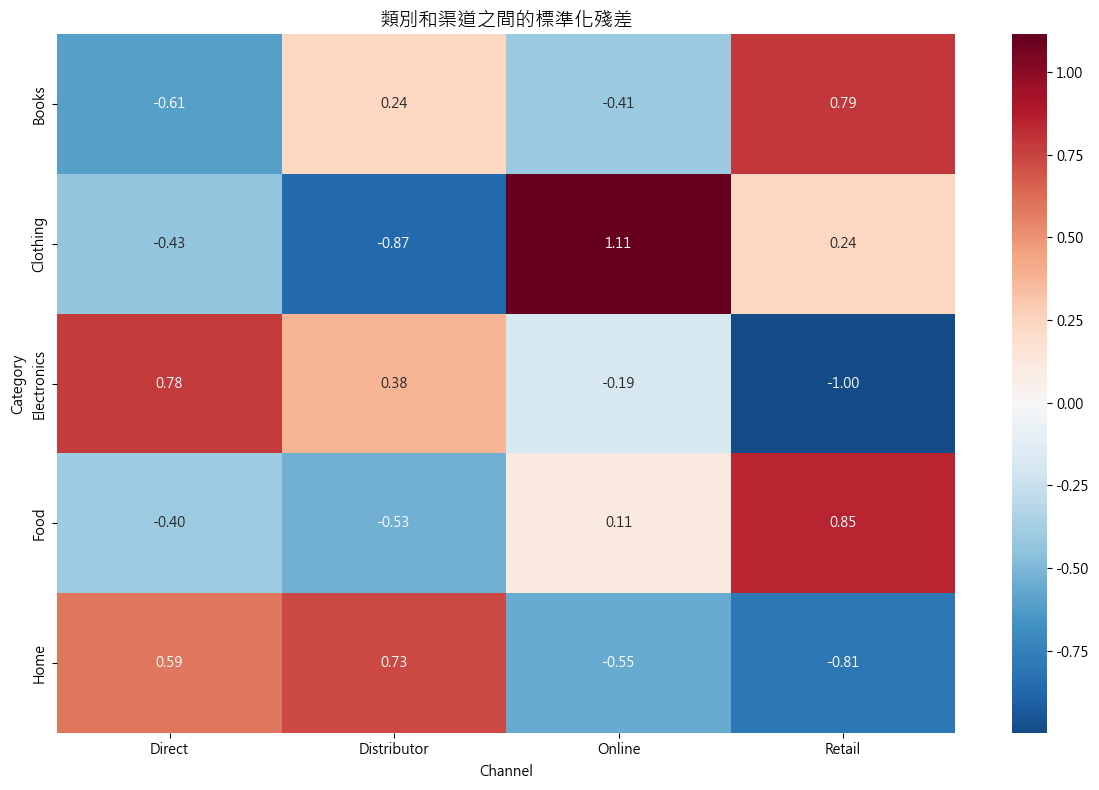

In [146]:
# 2. 標準化殘差 (衡量實際與期望的差異程度)
# 計算標準化殘差: (觀察值 - 期望值) / sqrt(期望值)
observed = category_channel_counts.values
residuals = (observed - expected) / np.sqrt(expected)

residual_df = pd.DataFrame(
    residuals, 
    index=category_channel_counts.index, 
    columns=category_channel_counts.columns
)

print("標準化殘差:")
print(residual_df.round(2))

# 可視化標準化殘差
plt.figure(figsize=(12, 8))
sns.heatmap(residual_df, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('類別和渠道之間的標準化殘差', fontsize=14)
plt.tight_layout()
plt.show()


## 📊 5. 數據重塑技術 (Reshaping)


### 5.1 Stack & Unstack 操作

In [147]:
# 1. Stack操作 - 將列轉為索引層級
# 先創建一個簡化的樞紐表用於演示
demo_pivot = pd.pivot_table(
    data=sales_data,
    values='Revenue',
    index=['Region', 'Category'],
    columns=['Year', 'Quarter'],
    aggfunc='sum'
)

print("示範用樞紐表:")
print(demo_pivot.head())

# Stack: 將列層級轉為行層級
stacked = demo_pivot.stack()
print("\nStack操作後:")
print(stacked.head(10))

# 進一步堆疊
multi_stacked = demo_pivot.stack(level=['Year', 'Quarter'])
print("\n多層級Stack後:")
print(multi_stacked.head(10))

示範用樞紐表:
Year                    2022                                2023                           
Quarter                   Q1       Q2       Q3       Q4       Q1       Q2       Q3       Q4
Region  Category                                                                           
Central Books        2851.00  3801.77  2498.25  3398.99  2684.91  2896.86  2648.90  3791.38
        Clothing     3215.97  3748.70  1747.79  2541.44  1880.02   657.73   862.64  1189.35
        Electronics  3851.84      NaN  2597.00  1920.93  3484.38  4356.79  2325.97  2955.89
        Food         2689.67  2154.40  2536.88  2183.41  1144.57  4235.57  2163.19  3378.15
        Home         1233.53  2455.96  2125.75  2082.82  2935.63  2051.64   896.30  2764.53

Stack操作後:
Year                            2022     2023
Region  Category    Quarter                  
Central Books       Q1       2851.00  2684.91
                    Q2       3801.77  2896.86
                    Q3       2498.25  2648.90
               

C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_38516\510528557.py:15: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked = demo_pivot.stack()
C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_38516\510528557.py:20: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  multi_stacked = demo_pivot.stack(level=['Year', 'Quarter'])


In [148]:
# 2. Unstack操作 - 將索引層級轉為列
# 從前面的stacked數據繼續
unstacked = stacked.unstack(level='Quarter')
print("部分Unstack後:")
print(unstacked.head())

# 多層級unstack
multi_unstacked = multi_stacked.unstack(level=['Category', 'Quarter'])
print("\n多層級Unstack後:")
print(multi_unstacked.head())

# 從原始數據中選擇性地unstack特定層級
region_cat_year_quarter = pd.pivot_table(
    data=sales_data,
    values='Revenue',
    index=['Region', 'Category', 'Year', 'Quarter'],
    aggfunc='sum'
)

print("\n四層級索引樞紐表:")
print(region_cat_year_quarter.head())

# 選擇性unstack - 將'Year'和'Quarter'提升為列
selective_unstack = region_cat_year_quarter.unstack(['Year', 'Quarter'])
print("\n選擇性Unstack後:")
print(selective_unstack.head())

部分Unstack後:
Year                    2022                                2023                           
Quarter                   Q1       Q2       Q3       Q4       Q1       Q2       Q3       Q4
Region  Category                                                                           
Central Books        2851.00  3801.77  2498.25  3398.99  2684.91  2896.86  2648.90  3791.38
        Clothing     3215.97  3748.70  1747.79  2541.44  1880.02   657.73   862.64  1189.35
        Electronics  3851.84      NaN  2597.00  1920.93  3484.38  4356.79  2325.97  2955.89
        Food         2689.67  2154.40  2536.88  2183.41  1144.57  4235.57  2163.19  3378.15
        Home         1233.53  2455.96  2125.75  2082.82  2935.63  2051.64   896.30  2764.53

多層級Unstack後:
Category        Books                            Clothing           ...     Food           \
Quarter            Q1       Q2       Q3       Q4       Q1       Q2  ...       Q3       Q4   
Region  Year                                        


### 5.2 Melt, Wide to Long & Long to Wide

In [149]:
# 1. Melt操作 - 將寬數據轉為長數據
# 創建一個寬格式的數據用於演示
wide_df = pd.pivot_table(
    data=sales_data,
    values='Revenue',
    index=['Region', 'Category'],
    columns='Channel',
    aggfunc='sum'
).reset_index()

print("寬格式數據:")
print(wide_df.head())

# 使用melt將數據從寬格式轉為長格式
melted = pd.melt(
    wide_df,
    id_vars=['Region', 'Category'],
    var_name='Channel',
    value_name='Revenue'
)

print("\n使用melt後的長格式數據:")
print(melted.head(10))

寬格式數據:
Channel   Region     Category   Direct  Distributor   Online   Retail
0        Central        Books  5048.41      7093.14  6271.91  6158.59
1        Central     Clothing  4399.00      3598.77  2731.06  5114.79
2        Central  Electronics  3488.67      7092.65  3312.85  7598.63
3        Central         Food  6836.95      3768.78  5253.60  4626.49
4        Central         Home  5443.94      6576.42  1945.55  2580.25

使用melt後的長格式數據:
    Region     Category Channel  Revenue
0  Central        Books  Direct  5048.41
1  Central     Clothing  Direct  4399.00
2  Central  Electronics  Direct  3488.67
3  Central         Food  Direct  6836.95
4  Central         Home  Direct  5443.94
5     East        Books  Direct  3696.56
6     East     Clothing  Direct  3623.05
7     East  Electronics  Direct  3975.55
8     East         Food  Direct  5828.43
9     East         Home  Direct  5144.69


In [150]:
# 2. 多列melt
# 創建包含多個指標的寬格式數據
multi_metric_wide = pd.pivot_table(
    data=sales_data,
    values=['Revenue', 'Profit'],
    index=['Region'],
    columns='Category',
    aggfunc='sum'
).reset_index()

print("多指標寬格式數據:")
print(multi_metric_wide.head())

# 合併列名以便於melt
multi_metric_wide.columns = ['_'.join(map(str, col)).strip('_') if col[0] != 'Region' else 'Region' 
                           for col in multi_metric_wide.columns.values]

print("\n合併列名後:")
print(multi_metric_wide.head())

# 使用melt轉換為長格式
multi_melted = pd.melt(
    multi_metric_wide,
    id_vars=['Region'],
    var_name='Metric_Category',
    value_name='Value'
)

# 分割Metric_Category成Metric和Category
multi_melted[['Metric', 'Category']] = multi_melted['Metric_Category'].str.split('_', n=1, expand=True)

print("\n多指標melt後的結果:")
print(multi_melted.head(10))

多指標寬格式數據:
           Region   Profit                                          Revenue                        \
Category             Books Clothing Electronics     Food     Home     Books  Clothing Electronics   
0         Central  8781.35  4516.31     6022.59  6438.09  3951.26  24572.05  15843.63    21492.79   
1            East  5913.56  5242.81     6774.03  6152.61  7374.29  18205.49  16846.88    18843.62   
2           North  4885.92  5732.82     7677.62  7038.29  8206.08  16225.99  17611.54    26668.73   
3           South  6789.93  6001.77     6686.19  6042.15  7440.98  20038.75  24314.36    19297.63   
4            West  6362.41  4332.41     6900.90  6941.27  5551.58  18973.44  15298.51    18976.50   

                              
Category      Food      Home  
0         20485.83  16546.17  
1         20330.88  20900.63  
2         19368.90  23045.86  
3         18465.17  19270.60  
4         19710.26  21622.31  

合併列名後:
    Region  Profit_Books  Profit_Clothing  Profit_Electro

In [151]:
# 3. 使用pivot將長格式數據轉為寬格式
# 從melted數據轉回寬格式
pivot_back = melted.pivot(
    index=['Region', 'Category'],
    columns='Channel',
    values='Revenue'
)

print("使用pivot將長格式轉回寬格式:")
print(pivot_back.head())

# 與原始wide_df比較
print("\n與原始寬格式數據相同嗎?")
comparison = pivot_back.reset_index() == wide_df.set_index(['Region', 'Category']).reset_index()
print(comparison.all().all())  # 檢查所有值是否都相同

使用pivot將長格式轉回寬格式:
Channel               Direct  Distributor   Online   Retail
Region  Category                                           
Central Books        5048.41      7093.14  6271.91  6158.59
        Clothing     4399.00      3598.77  2731.06  5114.79
        Electronics  3488.67      7092.65  3312.85  7598.63
        Food         6836.95      3768.78  5253.60  4626.49
        Home         5443.94      6576.42  1945.55  2580.25

與原始寬格式數據相同嗎?
True


## 📊 6. 實際業務應用案例

### 6.1 銷售數據多維分析儀表板

年度銷售趨勢:
    Year Quarter  Month   Profit   Revenue
0   2022      Q1      1  7332.32  22977.17
1   2022      Q1      2  8125.84  24474.13
2   2022      Q1      3  5019.09  18085.13
3   2022      Q2      4  9469.09  28506.11
4   2022      Q2      5  6247.68  20471.04
..   ...     ...    ...      ...       ...
19  2023      Q3      8  3109.77  10746.57
20  2023      Q3      9  5943.07  21163.19
21  2023      Q4     10  9211.51  27020.04
22  2023      Q4     11  8160.17  26067.18
23  2023      Q4     12  6647.70  17471.96

[24 rows x 5 columns]


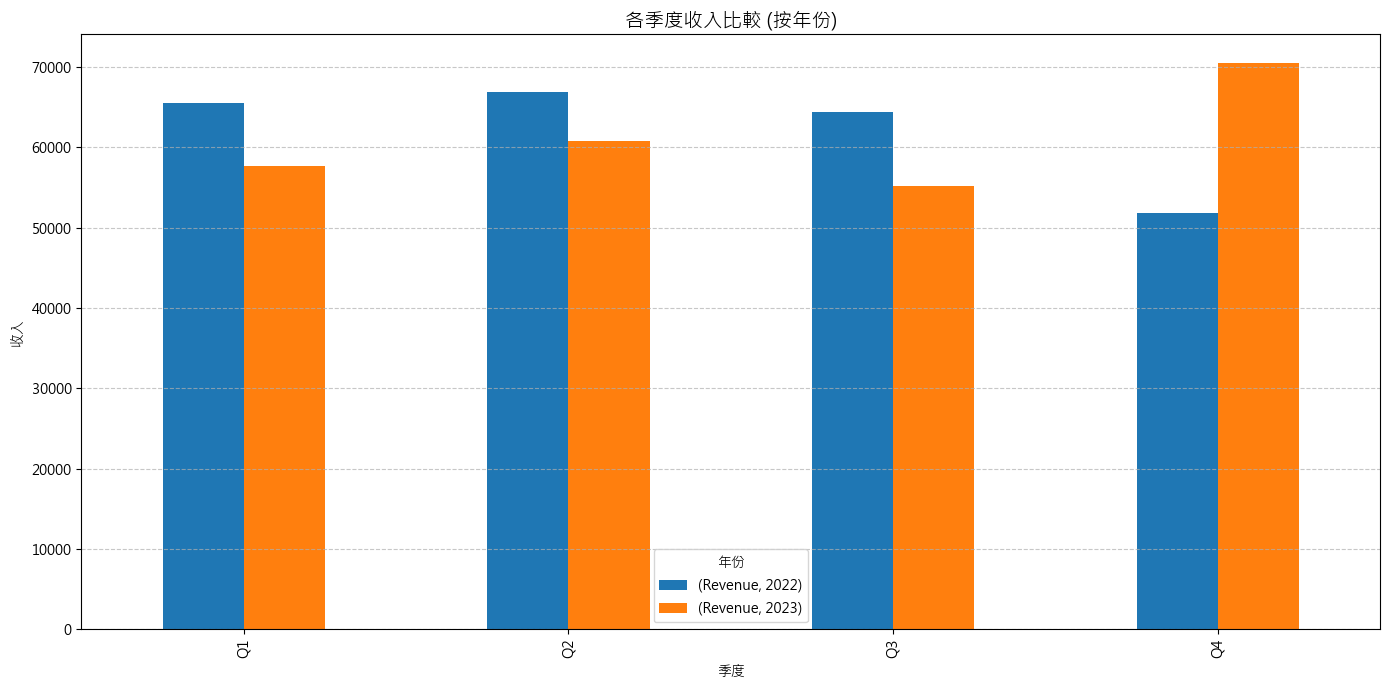

In [152]:
# 1. 年度銷售趨勢分析
yearly_trend = pd.pivot_table(
    data=sales_data,
    values=['Revenue', 'Profit'],
    index=['Year', 'Quarter', 'Month'],
    aggfunc='sum'
).reset_index()

print("年度銷售趨勢:")
print(yearly_trend)

# 可視化年度趨勢
plt.figure(figsize=(14, 7))
yearly_by_quarter = pd.pivot_table(
    data=sales_data,
    values=['Revenue'],
    index=['Quarter'],
    columns=['Year'],
    aggfunc='sum'
)

yearly_by_quarter.plot(kind='bar', ax=plt.gca())
plt.title('各季度收入比較 (按年份)', fontsize=14)
plt.xlabel('季度')
plt.ylabel('收入')
plt.legend(title='年份')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

產品組合分析 (按區域):
Region       Central  East  North  South  West  Total
Category                                             
Books           0.25  0.19   0.16   0.20  0.20   0.20
Clothing        0.16  0.18   0.17   0.24  0.16   0.18
Electronics     0.22  0.20   0.26   0.19  0.20   0.21
Food            0.21  0.21   0.19   0.18  0.21   0.20
Home            0.17  0.22   0.22   0.19  0.23   0.21


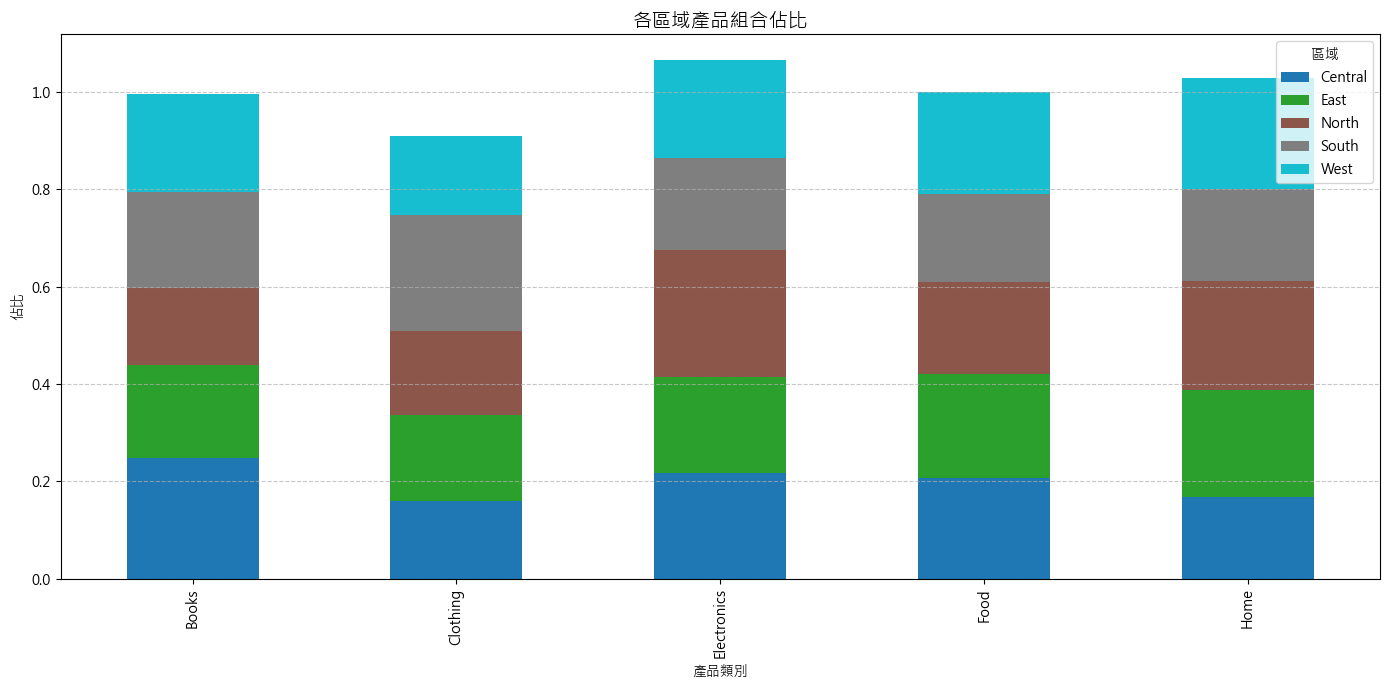

In [153]:
# 2. 產品組合分析
product_mix = pd.crosstab(
    index=sales_data['Category'],
    columns=sales_data['Region'],
    values=sales_data['Revenue'],
    aggfunc='sum',
    normalize='columns',
    margins=True,
    margins_name='Total'
)

print("產品組合分析 (按區域):")
print(product_mix.round(3))

# 可視化產品組合
plt.figure(figsize=(14, 7))
product_mix.loc[:'Total', :'West'].drop('Total', axis=0, errors='ignore').plot(
    kind='bar', stacked=True, ax=plt.gca(), colormap='tab10'
)
plt.title('各區域產品組合佔比', fontsize=14)
plt.xlabel('產品類別')
plt.ylabel('佔比')
plt.legend(title='區域')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

銷售渠道效率分析:
       Channel    Profit  Returns    Revenue  Units  Profit_Margin  Return_Rate  Revenue_per_Unit
0       Direct  41743.48      256  126573.37   2558           33.0         10.0             49.48
1  Distributor  39693.34      265  128029.48   2588           31.0         10.2             49.47
2       Online  36799.45      251  114089.48   2355           32.3         10.7             48.45
3       Retail  39520.95      258  124264.19   2436           31.8         10.6             51.01


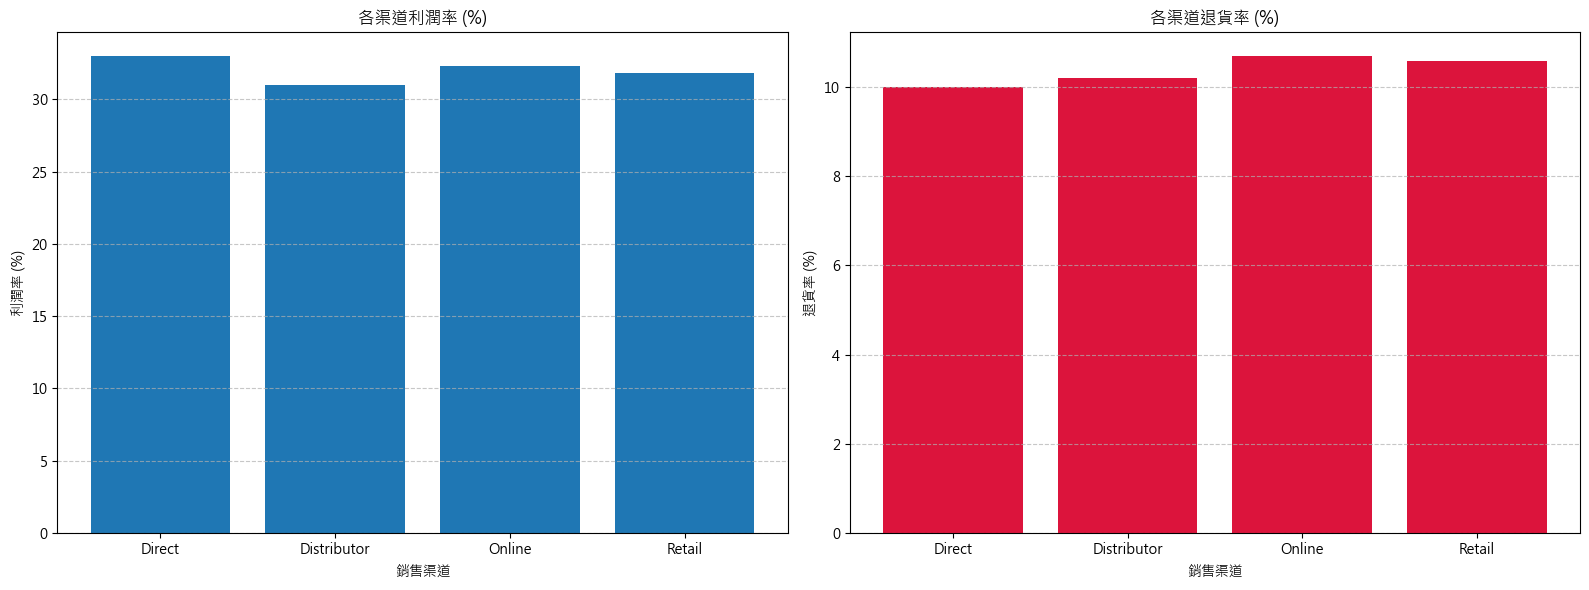

In [154]:
# 3. 銷售渠道效率分析
channel_efficiency = pd.pivot_table(
    data=sales_data,
    values=['Revenue', 'Profit', 'Units', 'Returns'],
    index=['Channel'],
    aggfunc={
        'Revenue': 'sum',
        'Profit': 'sum',
        'Units': 'sum',
        'Returns': 'sum'
    }
).reset_index()

# 計算KPI
channel_efficiency['Profit_Margin'] = (channel_efficiency['Profit'] / channel_efficiency['Revenue'] * 100).round(1)
channel_efficiency['Return_Rate'] = (channel_efficiency['Returns'] / channel_efficiency['Units'] * 100).round(1)
channel_efficiency['Revenue_per_Unit'] = (channel_efficiency['Revenue'] / channel_efficiency['Units']).round(2)

print("銷售渠道效率分析:")
print(channel_efficiency)

# 可視化渠道效率
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 利潤率比較
ax[0].bar(channel_efficiency['Channel'], channel_efficiency['Profit_Margin'])
ax[0].set_title('各渠道利潤率 (%)')
ax[0].set_xlabel('銷售渠道')
ax[0].set_ylabel('利潤率 (%)')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# 退貨率比較
ax[1].bar(channel_efficiency['Channel'], channel_efficiency['Return_Rate'], color='crimson')
ax[1].set_title('各渠道退貨率 (%)')
ax[1].set_xlabel('銷售渠道')
ax[1].set_ylabel('退貨率 (%)')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 6.2 高級報表與指標分析

In [155]:
# 1. 區域經理績效儀表板
# 假設每個Region有一名區域經理
region_manager = pd.pivot_table(
    data=sales_data,
    values=['Revenue', 'Profit', 'Units'],
    index=['Region'],
    aggfunc='sum'
)

# 計算更多KPI
region_manager['Avg_Unit_Price'] = (region_manager['Revenue'] / region_manager['Units']).round(2)
region_manager['Profit_Margin'] = (region_manager['Profit'] / region_manager['Revenue'] * 100).round(1)

# 計算各區域的排名
region_manager['Revenue_Rank'] = region_manager['Revenue'].rank(ascending=False, method='min').astype(int)
region_manager['Profit_Rank'] = region_manager['Profit'].rank(ascending=False, method='min').astype(int)
region_manager['Margin_Rank'] = region_manager['Profit_Margin'].rank(ascending=False, method='min').astype(int)

# 按收入排序
region_manager = region_manager.sort_values('Revenue', ascending=False)

print("區域經理績效儀表板:")
print(region_manager)

區域經理績效儀表板:
           Profit    Revenue  Units  Avg_Unit_Price  Profit_Margin  Revenue_Rank  Profit_Rank  \
Region                                                                                          
North    33540.73  102921.01   2178           47.25           32.6             1            1   
South    32961.02  101386.51   1929           52.56           32.5             2            2   
Central  29709.60   98940.48   1997           49.54           30.0             3            5   
East     31457.30   95127.50   1891           50.31           33.1             4            3   
West     30088.57   94581.02   1942           48.70           31.8             5            4   

         Margin_Rank  
Region                
North              2  
South              3  
Central            5  
East               1  
West               4  


In [156]:
# 2. 類別-渠道矩陣分析
category_channel_matrix = pd.pivot_table(
    data=sales_data,
    values=['Revenue', 'Profit', 'ProfitMargin'],
    index=['Category'],
    columns=['Channel'],
    aggfunc={
        'Revenue': 'sum',
        'Profit': 'sum',
        'ProfitMargin': 'mean'
    }
)

# 計算總計
category_channel_matrix['Total_Revenue'] = category_channel_matrix['Revenue'].sum(axis=1)
category_channel_matrix['Total_Profit'] = category_channel_matrix['Profit'].sum(axis=1)
category_channel_matrix['Overall_Margin'] = (category_channel_matrix['Total_Profit'] / 
                                          category_channel_matrix['Total_Revenue'] * 100).round(1)

print("類別-渠道矩陣分析:")
print(category_channel_matrix)

# 找出每個類別最佳的銷售渠道
best_channel = pd.DataFrame()
for category in category_channel_matrix.index:
    revenue_by_channel = category_channel_matrix.loc[category, 'Revenue']
    best_revenue_channel = revenue_by_channel.idxmax()[1]  # [1]獲取渠道名
    
    profit_by_channel = category_channel_matrix.loc[category, 'Profit']
    best_profit_channel = profit_by_channel.idxmax()[1]
    
    margin_by_channel = category_channel_matrix.loc[category, 'ProfitMargin']
    best_margin_channel = margin_by_channel.idxmax()[1]
    
    best_channel.loc[category, 'Best_Revenue_Channel'] = best_revenue_channel
    best_channel.loc[category, 'Best_Profit_Channel'] = best_profit_channel
    best_channel.loc[category, 'Best_Margin_Channel'] = best_margin_channel

print("\n每個類別的最佳銷售渠道:")
print(best_channel)

類別-渠道矩陣分析:
              Profit                               ProfitMargin              ...     Revenue  \
Channel       Direct Distributor   Online   Retail       Direct Distributor  ... Distributor   
Category                                                                     ...               
Books        7871.97     8747.50  7459.36  8654.34        42.80       48.62  ...    25889.15   
Clothing     6632.49     5582.16  7370.43  6241.04        38.60       36.19  ...    19522.20   
Electronics  9918.36     9335.29  7561.44  7246.24        55.49       44.29  ...    28761.98   
Food         7951.80     7732.34  7880.53  9047.74        41.32       50.03  ...    23021.74   
Home         9368.86     8296.05  6527.69  8331.59        51.23       35.93  ...    30834.40   

                                Total_Revenue Total_Profit Overall_Margin  
Channel        Online    Retail                                            
Category                                                            


## 📋 7. 總結與最佳實踐


### 7.1 樞紐表與交叉表的核心優勢

- **多維數據分析**：可同時從多個角度分析數據，發現複雜關係
- **彙總與計算**：強大的聚合函數能力，支持自定義計算公式
- **可視化準備**：提供結構化數據，便於後續視覺化展示
- **業務儀表板**：適合創建管理報表和業務儀表板


### 7.2 進階應用技巧總結

- **多層索引操作**：掌握Stack/Unstack/xs等操作，靈活處理複雜索引結構
- **數據重塑**：熟練運用Melt和Pivot轉換數據格式，適應不同分析需求
- **優化查詢**：巧用切片、過濾和索引選擇，高效獲取所需數據
- **清理結果**：使用重命名、索引重組和格式化，增強結果可讀性
- **深度分析**：結合統計檢驗和業務指標，實現從數據到洞察的轉化


### 7.3 實際應用建議

- **適用場景**：適合多維度對比、時間序列分析、組合分析等業務場景
- **性能考量**：處理大數據集時，先進行必要的過濾和抽樣，再進行樞紐操作
- **結果呈現**：根據受眾需求選擇適當的指標和格式，增強溝通效果
- **集成應用**：將樞紐表結果與視覺化工具結合，創建動態報表和儀表板
- **持續學習**：關注Pandas更新，掌握新特性和優化方法